In [ ]:
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epochs,log={}):
    if (log.get('acc')>=0.98):#-------------NOTE THE USE OF ACC IN PLACE OF ACCURACY FOR TF VERSION 2.3
      #print("\nReached {:.2f} % training accuracy".format(history.history['acc']))
      print("\nReached {:.2f} % training accuracy".format(log.get('acc')*100))
      #print('\n log',log.keys())
      self.model.stop_training=True

In [ ]:
callback=MyCallback()

model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['acc'])
model.build()
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2612 - acc: 0.9237 - val_loss: 0.1391 - val_acc: 0.9574
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1164 - acc: 0.9650 - val_loss: 0.0948 - val_acc: 0.9708
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0799 - acc: 0.9760 - val_loss: 0.0874 - val_acc: 0.9733
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0588 - acc: 0.9819
Reached 98.19 % training accuracy
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0588 - acc: 0.9819 - val_loss: 0.0900 - val_acc: 0.9722


In [ ]:
print('train_accuracy :',(history.history['acc'][-1]))
print('test_accuracy :',history.history['val_acc'][-1])
print('No.of epochs :',history.epoch)

train_accuracy : 0.9818666577339172
test_accuracy : 0.9721999764442444
No.of epochs : [0, 1, 2, 3]


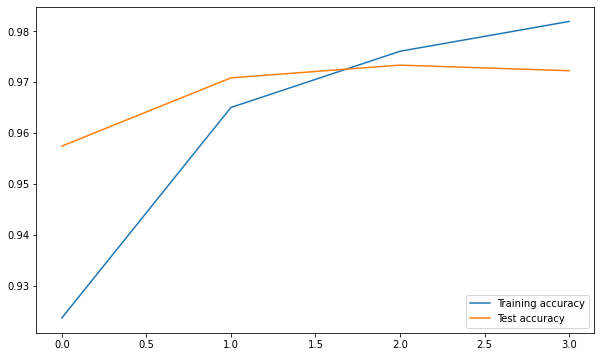

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training accuracy','Test accuracy'],loc='lower right')

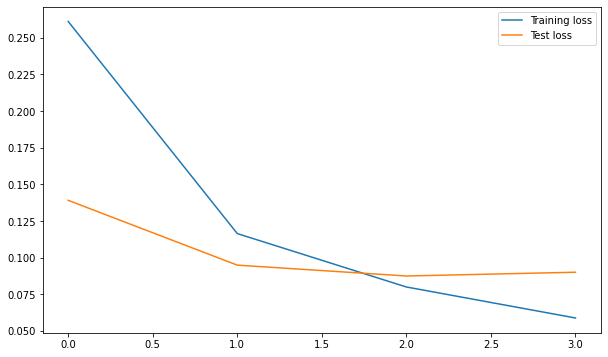

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Test loss'],loc='upper right')